In [869]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from statistics import NormalDist
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from summarytools import dfSummary

In [2]:
Categorical_Distributions_df = pd.read_csv('Categorical Distributions.csv')

In [3]:
Categorical_Distributions_df.head()

,Status
0,Placed
1,Not Placed
2,Placed
3,Not Placed
4,Not Placed


In [4]:
Categorical_Distributions_df.shape

(95, 1)

In [5]:
Categorical_Distributions_df.value_counts()

Status    
Placed        53
Not Placed    42
dtype: int64

In [6]:
pd.DataFrame(data=round(Categorical_Distributions_df.value_counts()/len(Categorical_Distributions_df)*100, 2), columns=({'Percentage'}))

,Percentage
Status,
Placed,55.79
Not Placed,44.21


In [7]:
pd.pivot_table(data=Categorical_Distributions_df,index=['Status'], aggfunc= {'Status': 'count'})

,Status
Status,
Not Placed,42
Placed,53


In [8]:
Numerical_Distributions_df = pd.read_csv('Numerical Distributions.csv')

In [9]:
Numerical_Distributions_df.head()

,Annual Salary (Thousands of USD)
0,111.0
1,107.0
2,109.0
3,148.0
4,255.5


In [10]:
Numerical_Distributions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 1 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Annual Salary (Thousands of USD)  53 non-null     float64
dtypes: float64(1)
memory usage: 552.0 bytes


In [11]:
pd.pivot_table(data=Numerical_Distributions_df, 
               index=['Annual Salary (Thousands of USD)'], 
               aggfunc={'Annual Salary (Thousands of USD)': 'count'})

,Annual Salary (Thousands of USD)
Annual Salary (Thousands of USD),
75.5,1
78.0,1
80.0,1
82.0,2
82.5,1
84.0,1
86.0,1
89.5,1
91.5,2


array([[<AxesSubplot:title={'center':'Annual Salary (Thousands of USD)'}>]],
      dtype=object)

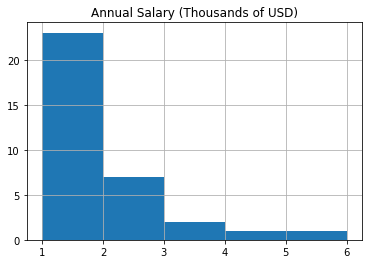

In [12]:
pd.pivot_table(data=Numerical_Distributions_df, 
               index=['Annual Salary (Thousands of USD)'], 
               aggfunc={'Annual Salary (Thousands of USD)': 'count'}).hist(bins=5)

array([[<AxesSubplot:title={'center':'Annual Salary (Thousands of USD)'}>]],
      dtype=object)

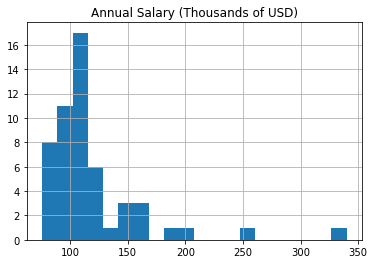

In [13]:
Numerical_Distributions_df.hist(bins=20)

In [14]:
Frequency_Distributions_df = pd.read_csv('Frequency Distributions.csv')

In [15]:
Frequency_Distributions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95 entries, 0 to 94
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   MBA Grade  95 non-null     float64
dtypes: float64(1)
memory usage: 888.0 bytes


In [16]:
Frequency_Distributions_df.head()

,MBA Grade
0,90.2
1,92.8
2,68.7
3,80.7
4,74.9


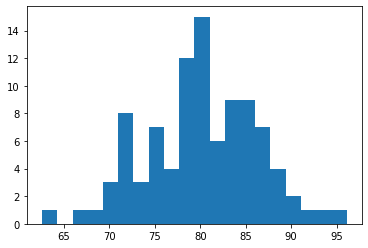

In [17]:
fig, ax = plt.subplots()
ax.hist(Frequency_Distributions_df, bins=20);

In [18]:
Mean_Median_Mode_df = pd.read_csv('Mean, Median, Mode.csv')

In [19]:
Mean_Median_Mode_df.head()

,Work Experience,Annual Salary
0,No,"$111,000"
1,Yes,"$107,000"
2,No,"$109,000"
3,No,"$148,000"
4,No,"$255,500"


In [20]:
Mean_Median_Mode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Work Experience  53 non-null     object
 1   Annual Salary    53 non-null     object
dtypes: object(2)
memory usage: 976.0+ bytes


In [21]:
Mean_Median_Mode_df['Annual Salary'] = Mean_Median_Mode_df['Annual Salary'].astype(str).str.replace('$', '', regex=False)
Mean_Median_Mode_df['Annual Salary'] = Mean_Median_Mode_df['Annual Salary'].astype(str).str.replace(',', '', regex=False)
Mean_Median_Mode_df['Annual Salary'] = pd.to_numeric(Mean_Median_Mode_df['Annual Salary'])

In [22]:
Mean_Median_Mode_df.head()

,Work Experience,Annual Salary
0,No,111000
1,Yes,107000
2,No,109000
3,No,148000
4,No,255500


In [23]:
Mean_Median_Mode_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Work Experience  53 non-null     object
 1   Annual Salary    53 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 976.0+ bytes


In [24]:
Mean_Median_Mode_df.mode()

,Work Experience,Annual Salary
0,No,103500


In [25]:
Mean_Median_Mode_df.groupby('Work Experience').mean()

,Annual Salary
Work Experience,
No,116902.777778
Yes,124647.058824


In [26]:
Mean_Median_Mode_df.groupby('Work Experience').median()

,Annual Salary
Work Experience,
No,105750.0
Yes,103500.0


In [27]:
Mean_Median_Mode_df.groupby('Work Experience').agg(pd.Series.mode)

,Annual Salary
Work Experience,
No,103500
Yes,"[99000, 99500, 103500, 124500]"


In [28]:
Mean_Median_Mode_df[Mean_Median_Mode_df['Work Experience'] == 'Yes'].groupby('Annual Salary').count().sort_values(by='Work Experience', ascending=False)

,Work Experience
Annual Salary,
99000,2
99500,2
103500,2
124500,2
80000,1
86000,1
103000,1
107000,1
113000,1


In [29]:
Mean_Median_Mode_df.mean(numeric_only=True)

Annual Salary    119386.792453
dtype: float64

In [30]:
Mean_Median_Mode_df.median(numeric_only=True)

Annual Salary    104500.0
dtype: float64

In [31]:
Mean_Median_Mode_df.skew(numeric_only=True)

Annual Salary    2.932434
dtype: float64

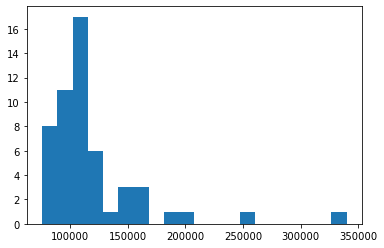

In [32]:
fig, ax = plt.subplots()
ax.hist(Mean_Median_Mode_df['Annual Salary'], bins=20);

In [33]:
Central_Tendency_df = pd.read_csv('Central Tendency.csv')

In [34]:
Central_Tendency_df.head()

,Business Undergrads,Other Undergrads
0,90.2,68.7
1,92.8,80.7
2,88.7,74.9
3,87.5,80.7
4,71.3,83.3


In [35]:
Central_Tendency_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Business Undergrads  36 non-null     float64
 1   Other Undergrads     59 non-null     float64
dtypes: float64(2)
memory usage: 1.0 KB


In [36]:
Central_Tendency_df['Business Undergrads'].count()

36

In [37]:
Central_Tendency_df['Business Undergrads'].mean()

81.32777777777778

In [38]:
Central_Tendency_df['Business Undergrads'].median()

80.55

In [39]:
Central_Tendency_df['Business Undergrads'].mode()

0    87.5
Name: Business Undergrads, dtype: float64

In [40]:
Central_Tendency_df['Business Undergrads'].skew()

0.2881649781578145

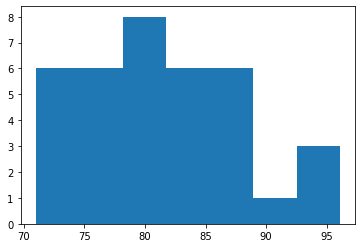

In [41]:
fig, ax = plt.subplots()
ax.hist(Central_Tendency_df['Business Undergrads'], bins=7);

In [42]:
Central_Tendency_df['Other Undergrads'].count()

59

In [43]:
Central_Tendency_df['Other Undergrads'].mean()

79.46271186440678

In [44]:
Central_Tendency_df['Other Undergrads'].mode()

0    80.7
Name: Other Undergrads, dtype: float64

In [45]:
Central_Tendency_df['Other Undergrads'].median()

80.0

In [46]:
Central_Tendency_df['Other Undergrads'].skew()

-0.6060179698726653

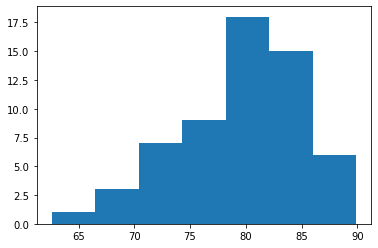

In [47]:
fig, ax = plt.subplots()
ax.hist(Central_Tendency_df['Other Undergrads'], bins=7);

In [48]:
Min_Max_Range_df = pd.read_csv('Min, Max, Range.csv')

In [49]:
Min_Max_Range_df.head()

,Employability (Before),Employability (After)
0,252,276
1,423,410
2,101,119
3,288,334
4,248,252


In [50]:
Min_Max_Range_df['Employability (Before)'].min()

62

In [51]:
Min_Max_Range_df['Employability (Before)'].max()

423

In [52]:
Min_Max_Range_df['Employability (Before)'].max() - Min_Max_Range_df['Employability (Before)'].min()

361

In [53]:
Min_Max_Range_df['Employability (After)'].min()

102

In [54]:
Min_Max_Range_df['Employability (After)'].max()

481

In [55]:
Min_Max_Range_df['Employability (After)'].max() - Min_Max_Range_df['Employability (After)'].min()

379

In [56]:
Q3, Q1 = np.percentile(Min_Max_Range_df['Employability (Before)'], [75 ,25])

In [57]:
Q3, Q1

(287.0, 181.5)

In [58]:
IQR = Q3 - Q1

In [59]:
IQR

105.5

In [60]:
Q3, Q1 = np.percentile(Min_Max_Range_df['Employability (After)'], [75 ,25])

In [61]:
Q3, Q1

(348.0, 228.0)

In [62]:
IQR = Q3 - Q1

In [63]:
IQR

120.0

<AxesSubplot:>

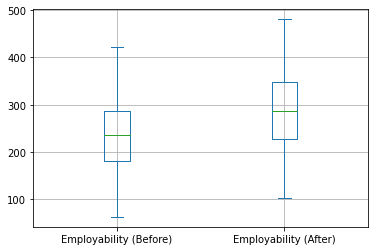

In [64]:
Min_Max_Range_df.plot.box(grid='True')

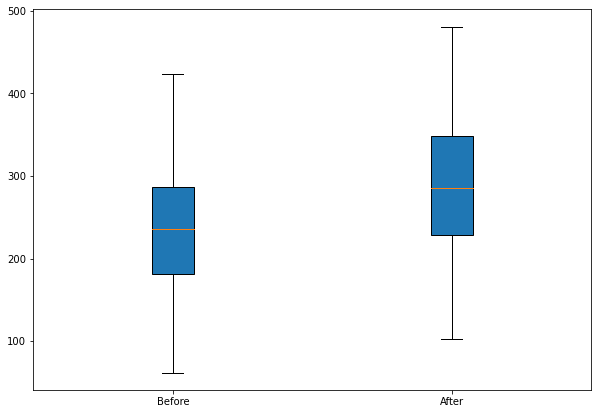

In [65]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(Min_Max_Range_df, patch_artist=True, labels=['Before', 'After'])
# plt.boxplot(Min_Max_Range_df['Employability (After)'], labels=['After'])
 
# show plot
plt.show()

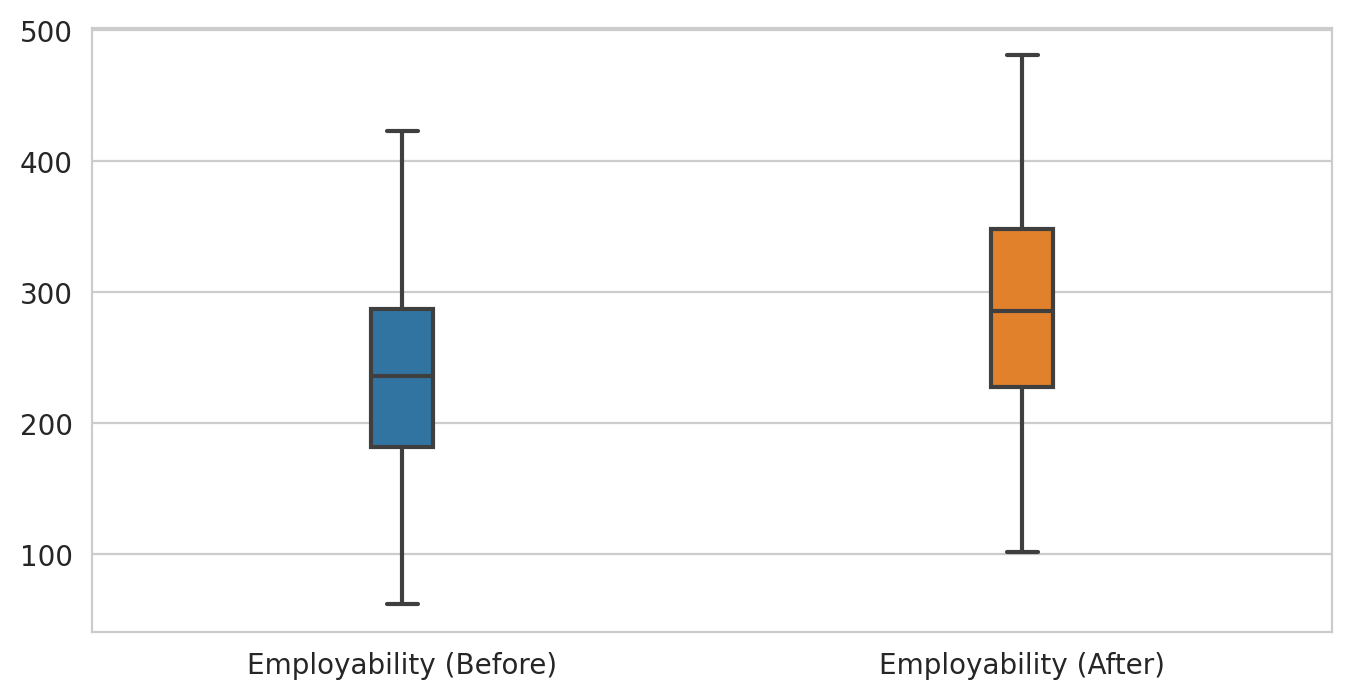

In [66]:
plt.figure(figsize=(8,4), dpi=200)
with sns.axes_style("whitegrid"):
    sns.boxplot(data=Min_Max_Range_df, width=0.1)
plt.show()

In [67]:
Variance_Std_Dev_df = pd.read_csv('Variance & Std Dev.csv')

In [68]:
Variance_Std_Dev_df.head()

,Employability (Before),Employability (After),Employability Improvement
0,252,276,24
1,423,410,-13
2,101,119,18
3,288,334,46
4,248,252,4


In [69]:
# for SAMPLES calculations use PANDAS

In [70]:
Variance_Std_Dev_df['Employability Improvement'].mean()

49.44210526315789

In [71]:
Variance_Std_Dev_df['Employability Improvement'].var()

879.4194848824187

In [72]:
Variance_Std_Dev_df['Employability Improvement'].std()

29.655007753875545

In [73]:
# for POPULATION calculations use NUMPY

In [74]:
np.mean(Variance_Std_Dev_df['Employability Improvement'])

49.44210526315789

In [75]:
np.var(Variance_Std_Dev_df['Employability Improvement'])

870.1624376731302

In [76]:
np.std(Variance_Std_Dev_df['Employability Improvement'])

29.498515855431272

In [77]:
Coefficient_of_Variation = pd.read_csv('Coefficient of Variation.csv')

In [78]:
Coefficient_of_Variation.head()

,MBA Grade,Employability (After)
0,90.2,276
1,92.8,410
2,68.7,119
3,80.7,334
4,74.9,252


In [79]:
Coefficient_of_Variation['MBA Grade'].mean(), Coefficient_of_Variation['Employability (After)'].mean()

(80.16947368421052, 289.34736842105264)

In [80]:
Coefficient_of_Variation['MBA Grade'].std(), Coefficient_of_Variation['Employability (After)'].std()

(6.170780041112261, 93.52104876523815)

In [81]:
print(f"Cofficient of variation for MBA Grades: {Coefficient_of_Variation['MBA Grade'].std()/Coefficient_of_Variation['MBA Grade'].mean()}")

Cofficient of variation for MBA Grades: 0.0769716920609846


In [82]:
print(f"Cofficient of variation for Employability : {Coefficient_of_Variation['Employability (After)'].std()/Coefficient_of_Variation['Employability (After)'].mean()}")

Cofficient of variation for Employability : 0.32321375264470403


In [83]:
Frequency_Distributions_df.head()

,MBA Grade
0,90.2
1,92.8
2,68.7
3,80.7
4,74.9


In [84]:
Frequency_Distributions_df.mean()

MBA Grade    80.169474
dtype: float64

In [85]:
Frequency_Distributions_df.median()

MBA Grade    80.2
dtype: float64

In [86]:
Frequency_Distributions_df.std()

MBA Grade    6.17078
dtype: float64

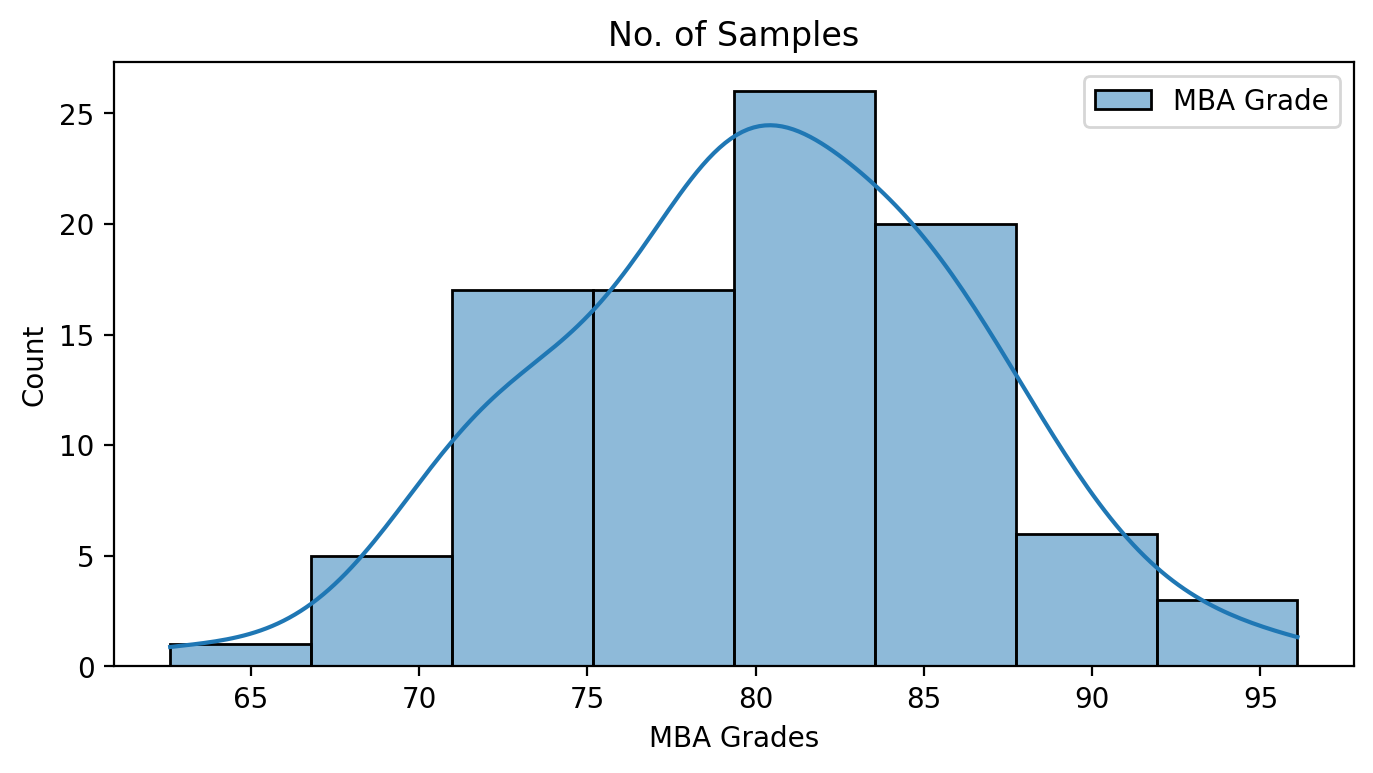

In [87]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=Frequency_Distributions_df,
             bins=8,
             kde=True)
plt.xlabel('MBA Grades')
plt.title('No. of Samples')
plt.show()

In [88]:
Frequency_Distributions_df.loc[18]

MBA Grade    96.1
Name: 18, dtype: float64

In [89]:
stats.zscore(Frequency_Distributions_df).loc[18]

MBA Grade    2.595302
Name: 18, dtype: float64

In [90]:
z_values = Frequency_Distributions_df.copy()
z_values['Z-score'] = stats.zscore(Frequency_Distributions_df)
z_values['Z-score calculated'] = (Frequency_Distributions_df-Frequency_Distributions_df.mean())/Frequency_Distributions_df.std()

In [91]:
z_values

,MBA Grade,Z-score,Z-score calculated
0,90.2,1.634111,1.625488
1,92.8,2.057687,2.046828
2,68.7,-1.868535,-1.858675
3,80.7,0.086430,0.085974
4,74.9,-0.858470,-0.853940
...,...,...,...
90,77.9,-0.369729,-0.367777
91,86.1,0.966164,0.961066
92,89.9,1.585237,1.576871
93,83.1,0.477423,0.474904


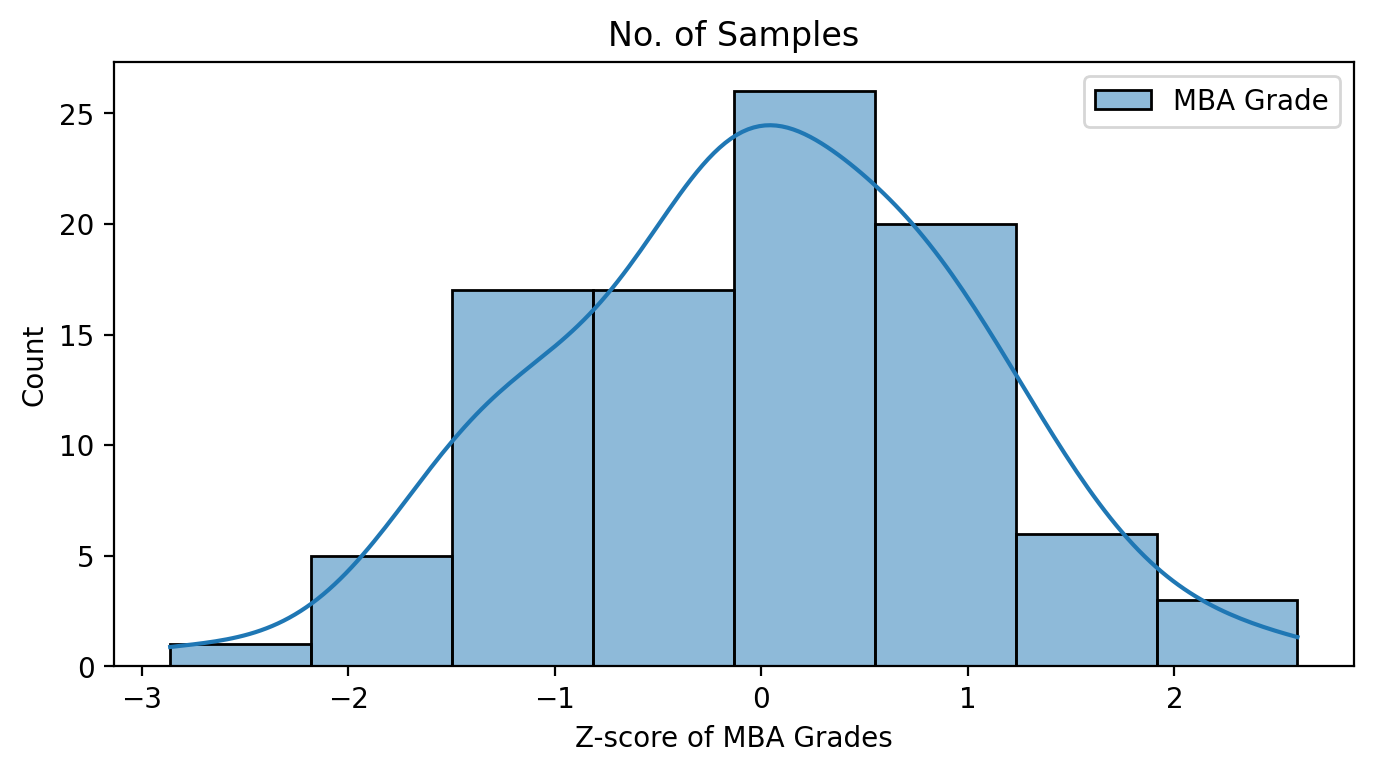

In [92]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=stats.zscore(Frequency_Distributions_df),
             bins=8,
             kde=True)
plt.xlabel('Z-score of MBA Grades')
plt.title('No. of Samples')
plt.show()

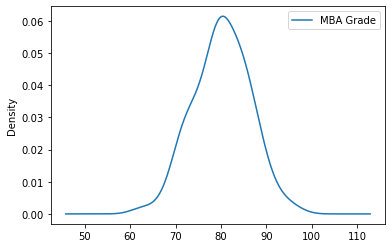

In [93]:
Frequency_Distributions_df.plot.kde();

In [94]:
# Empirical Rule

In [95]:
Frequency_Distributions_df.head()

,MBA Grade
0,90.2
1,92.8
2,68.7
3,80.7
4,74.9


In [96]:
index = ['Lower',
         'Upper',
         'Empirical Rule',
         'Sample']

In [97]:
lower = [Frequency_Distributions_df.mean()[0]-Frequency_Distributions_df.std()[0] * 1, 
         Frequency_Distributions_df.mean()[0]-Frequency_Distributions_df.std()[0] * 2,
         Frequency_Distributions_df.mean()[0]-Frequency_Distributions_df.std()[0] * 3]
lower

[73.99869364309825, 67.827913601986, 61.65713356087373]

In [98]:
upper = [Frequency_Distributions_df.mean()[0]+Frequency_Distributions_df.std()[0] * 1, 
         Frequency_Distributions_df.mean()[0]+Frequency_Distributions_df.std()[0] * 2,
         Frequency_Distributions_df.mean()[0]+Frequency_Distributions_df.std()[0] * 3]
upper

[86.34025372532278, 92.51103376643503, 98.6818138075473]

In [99]:
emp_rule = [68, 95, 99.7]

In [100]:
sample = [
    Frequency_Distributions_df[(Frequency_Distributions_df>=lower[0]) & (Frequency_Distributions_df<=upper[0])].count()[0]/len(Frequency_Distributions_df)*100,
    Frequency_Distributions_df[(Frequency_Distributions_df>=lower[1]) & (Frequency_Distributions_df<=upper[1])].count()[0]/len(Frequency_Distributions_df)*100,
    Frequency_Distributions_df[(Frequency_Distributions_df>=lower[2]) & (Frequency_Distributions_df<=upper[2])].count()[0]/len(Frequency_Distributions_df)*100
]
sample

[69.47368421052632, 94.73684210526315, 100.0]

In [101]:
empirical_rule_df = pd.DataFrame(
    index=index,
    data=[lower, upper, emp_rule, sample],
    columns=({1,2,3})
)
empirical_rule_df

,1,2,3
Lower,73.998694,67.827914,61.657134
Upper,86.340254,92.511034,98.681814
Empirical Rule,68.000000,95.000000,99.700000
Sample,69.473684,94.736842,100.000000


In [102]:
def empirical_rule(df):
    df = df.copy()
    
    index = ['Lower',
         'Upper',
         'Empirical Rule',
         'Sample']
    
    lower = [df.mean()[0]-df.std()[0] * 1, 
             df.mean()[0]-df.std()[0] * 2,
             df.mean()[0]-df.std()[0] * 3]
    
    upper = [df.mean()[0]+df.std()[0] * 1, 
             df.mean()[0]+df.std()[0] * 2,
             df.mean()[0]+df.std()[0] * 3]
    
    emp_rule = [68, 95, 99.7]
    
    sample = [
        df[(df>=lower[0]) & (df<=upper[0])].count()[0]/len(df)*100,
        df[(df>=lower[1]) & (df<=upper[1])].count()[0]/len(df)*100,
        df[(df>=lower[2]) & (df<=upper[2])].count()[0]/len(df)*100
    ]
    
    empirical_rule = pd.DataFrame(
        index=index,
        data=[lower, upper, emp_rule, sample],
        columns=({1,2,3})
    )
    return empirical_rule

In [103]:
empirical_rule(Frequency_Distributions_df)

,1,2,3
Lower,73.998694,67.827914,61.657134
Upper,86.340254,92.511034,98.681814
Empirical Rule,68.000000,95.000000,99.700000
Sample,69.473684,94.736842,100.000000


In [104]:
empirical_rule(Numerical_Distributions_df)

,1,2,3
Lower,73.839834,28.292876,-17.254082
Upper,164.933751,210.480709,256.027667
Empirical Rule,68.000000,95.000000,99.700000
Sample,88.679245,96.226415,98.113208


In [105]:
# Finding the probability for a normal distribution

In [106]:
Frequency_Distributions_df.head()

,MBA Grade
0,90.2
1,92.8
2,68.7
3,80.7
4,74.9


In [107]:
NormalDist(mu=Frequency_Distributions_df.mean()[0], sigma=Frequency_Distributions_df.std()[0]).pdf(70)

0.016627067938365894

In [108]:
# Probability that a student will score at least a grade of 70 <70
NormalDist(mu=Frequency_Distributions_df.mean()[0], sigma=Frequency_Distributions_df.std()[0]).cdf(70)*100

4.967586709822819

In [109]:
# What is the probability of a graduate getting a final grade 1 standard deviation away from the mean at the most?
z_lower = stats.norm.cdf(-1)
z_lower*100

15.865525393145708

In [110]:
z_upper = stats.norm.cdf(1)
z_upper*100

84.1344746068543

In [111]:
(z_upper-z_lower)*100

68.26894921370858

In [112]:
# What is the probability of a graduate getting a final grade of 90 or higher? >90
(1-NormalDist(mu=Frequency_Distributions_df.mean()[0], sigma=Frequency_Distributions_df.std()[0]).cdf(90))*100

5.557148533193246

In [178]:
# Examples
NormalDist(mu=195.2, sigma=10.26).pdf(200)

0.034852627336031755

In [179]:
NormalDist(mu=195.2, sigma=10.26).cdf(200) - NormalDist(mu=195.2, sigma=10.26).cdf(190)

0.37390951048328214

In [180]:
1 - NormalDist(mu=195.2, sigma=10.26).cdf(200)

0.31995084502443927

In [218]:
mean = Frequency_Distributions_df.mean().values[0]
stdiv = Frequency_Distributions_df.std().values[0]
mean, stdiv
pdf = NormalDist(mu=mean, sigma=stdiv).pdf(60)
pdf

0.0003095293139565681

In [206]:
def PDF_CDF(df):
    df_new = df.copy()
    df_new.sort_values(by=df.columns[0], inplace=True)
    df_new.reset_index(inplace=True)
    df_new.drop('index', axis=1, inplace=True)
    mean = df_new.mean().values[0]
    stdiv = df_new.std().values[0]
    pdf = []
    cdf = []
#     pdf = (1/(stdiv*np.sqrt(2*np.pi))) * np.exp((-0.5)*np.square((df_new-mean)/stdiv))
    for value in df_new.values:
        pdf.append(NormalDist(mu=mean, sigma=stdiv).pdf(value))
        cdf.append(NormalDist(mu=mean, sigma=stdiv).cdf(value))
    df_new.insert(1, 'PDF', pdf)
    df_new.insert(2, 'CDF', cdf)
    return df_new

In [213]:
pdf_df = PDF_CDF(Frequency_Distributions_df)
pdf_df

80.16947368421052


,MBA Grade,PDF,CDF
0,62.6,0.001123,0.002205
1,66.9,0.006404,0.015763
2,68.7,0.011492,0.031537
3,69.9,0.016187,0.048035
4,70.5,0.018940,0.058560
...,...,...,...
90,89.9,0.018648,0.942587
91,90.2,0.017251,0.947971
92,92.7,0.008226,0.978853
93,92.8,0.007958,0.979663


<AxesSubplot:>

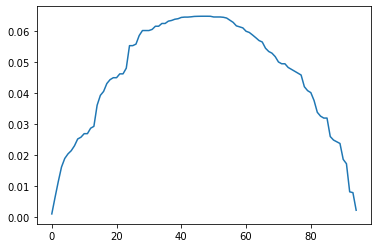

In [219]:
pdf_df.PDF.plot()

In [221]:
# Inverse Normal distribution
mean = Frequency_Distributions_df.mean().values[0]
stdiv = Frequency_Distributions_df.std().values[0]
mean, stdiv
NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.25)

76.00734579576574

In [222]:
NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.75)

84.33160157265529

In [234]:
# How many standard deviations away from the average MBA grade are the bottom 20% of graduates?
NormalDist(mu=mean, sigma=stdiv).zscore(NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.20))

-0.8416212335729139

In [237]:
# What grade do graduates need to score in the top 10% of the class?
NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.90)

88.0776465065293

In [238]:
NormalDist(mu=mean, sigma=stdiv).zscore(NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.90))

1.2815515655446001

In [259]:
# CLT

In [260]:
# Margin of error

In [292]:
# What is the mean employability score we can expect from our future graduates, with 90% confidence?

In [261]:
Margin_of_Error_df = pd.read_csv('Margin of Error.csv')

In [262]:
Margin_of_Error_df.head()

,Employability (After)
0,276
1,410
2,119
3,334
4,252


In [264]:
samples = len(Margin_of_Error_df)
samples

95

In [267]:
mean = Margin_of_Error_df.mean().values[0]
mean

289.34736842105264

In [275]:
std = Margin_of_Error_df.std().values[0]
std

93.52104876523815

In [276]:
population_std = 90
population_std

90

In [286]:
confidence_level = 0.9

In [287]:
alpha = 1-confidence_level
alpha

0.09999999999999998

In [288]:
critical_value_z = np.abs(NormalDist(mu=mean, sigma=std).zscore(NormalDist(mu=mean, sigma=std).inv_cdf(alpha/2)))
critical_value_z

1.6448536269514726

In [289]:
standard_error = population_std/(np.sqrt(samples))
standard_error

9.233805168766388

In [290]:
confidence_interval = [mean - (critical_value_z*standard_error), mean + (critical_value_z*standard_error)]
confidence_interval

[274.159110498644, 304.5356263434613]

In [291]:
margin_of_error = standard_error*critical_value_z
margin_of_error

15.188257922408647

In [293]:
# What is the mean annual salary we can expect from our future graduates?

In [313]:
Confidence_Intervals_df = pd.read_csv('Confidence Intervals (z).csv')

In [314]:
Confidence_Intervals_df.head()

,Annual Salary
0,"$111,000"
1,"$107,000"
2,"$109,000"
3,"$148,000"
4,"$255,500"


In [315]:
Confidence_Intervals_df['Annual Salary'] = Confidence_Intervals_df['Annual Salary'].astype(str).str.replace('$', '', regex=False)
Confidence_Intervals_df['Annual Salary'] = Confidence_Intervals_df['Annual Salary'].astype(str).str.replace(',', '', regex=False)
Confidence_Intervals_df['Annual Salary'] = pd.to_numeric(Confidence_Intervals_df['Annual Salary'])

In [316]:
Confidence_Intervals_df.head()

,Annual Salary
0,111000
1,107000
2,109000
3,148000
4,255500


In [317]:
sample_size = len(Confidence_Intervals_df)
sample_size

53

In [318]:
sample_mean = Confidence_Intervals_df.mean().values[0]
sample_mean

119386.7924528302

In [319]:
sample_std = Confidence_Intervals_df.std().values[0]
sample_std

45546.95817647072

In [320]:
population_mean = 101000
population_mean

101000

In [321]:
population_std = 76000
population_std

76000

In [322]:
confidence_level = 0.95
confidence_level

0.95

In [323]:
alpha = 1-confidence_level
alpha

0.050000000000000044

In [329]:
critical_value_z = np.abs(NormalDist(mu=population_mean, sigma=population_std).zscore(NormalDist(mu=population_mean, sigma=population_std).inv_cdf(alpha/2)))
critical_value_z

1.9599639845400536

In [330]:
standard_error = population_std/(np.sqrt(sample_size))
standard_error

10439.402860100367

In [331]:
margin_of_error = standard_error*critical_value_z
margin_of_error

20460.853625901145

In [332]:
confidence_interval = [population_mean - (critical_value_z*standard_error), population_mean + (critical_value_z*standard_error)]
confidence_interval

[80539.14637409885, 121460.85362590115]

In [333]:
# T Distribution where population std is unknown

In [334]:
# What is the mean employability score we can expect from our future graduates, with 90% confidence?

In [470]:
Margin_of_Error_df = pd.read_csv('Margin of Error.csv')

In [471]:
Margin_of_Error_df.head()

,Employability (After)
0,276
1,410
2,119
3,334
4,252


In [472]:
sample_size = len(Margin_of_Error_df)
sample_size

95

In [473]:
sample_mean = Margin_of_Error_df.mean().values[0]
sample_mean

289.34736842105264

In [474]:
sample_std = Margin_of_Error_df.std().values[0]
sample_std

93.52104876523815

In [475]:
confidence_level = 0.9

In [476]:
alpha = 1-confidence_level
alpha

0.09999999999999998

In [477]:
critical_value_t = np.absolute(stats.t.ppf(q=alpha/2,df=sample_size-1))
critical_value_t

1.6612258552697992

In [478]:
standard_error = sample_std/(np.sqrt(sample_size))
standard_error

9.595057149743438

In [479]:
margin_of_error = standard_error*critical_value_t
margin_of_error

15.939557019945143

In [480]:
confidence_interval = [sample_mean - (critical_value_t*standard_error), sample_mean + (critical_value_t*standard_error)]
confidence_interval

[273.4078114011075, 305.2869254409978]

In [481]:
# What is the mean annual salary we can expect from our future graduates?

In [482]:
Confidence_Intervals_df = pd.read_csv('Confidence Intervals (z).csv')

In [483]:
Confidence_Intervals_df.head()

,Annual Salary
0,"$111,000"
1,"$107,000"
2,"$109,000"
3,"$148,000"
4,"$255,500"


In [484]:
Confidence_Intervals_df['Annual Salary'] = Confidence_Intervals_df['Annual Salary'].astype(str).str.replace('$', '', regex=False)
Confidence_Intervals_df['Annual Salary'] = Confidence_Intervals_df['Annual Salary'].astype(str).str.replace(',', '', regex=False)
Confidence_Intervals_df['Annual Salary'] = pd.to_numeric(Confidence_Intervals_df['Annual Salary'])

In [485]:
Confidence_Intervals_df.head()

,Annual Salary
0,111000
1,107000
2,109000
3,148000
4,255500


In [486]:
sample_size = len(Confidence_Intervals_df)
sample_size

53

In [487]:
sample_mean = Confidence_Intervals_df.mean().values[0]
sample_mean

119386.7924528302

In [488]:
sample_std = Confidence_Intervals_df.std().values[0]
sample_std

45546.95817647072

In [489]:
confidence_level = 0.8

In [490]:
alpha = 1-confidence_level
alpha

0.19999999999999996

In [491]:
critical_value_t = stats.t.isf(alpha/2, df=sample_size-1)
critical_value_t

1.2980450160327173

In [492]:
standard_error = sample_std/(np.sqrt(sample_size))
standard_error

6256.3558612673705

In [493]:
margin_of_error = standard_error*critical_value_t
margin_of_error

8121.031544245188

In [494]:
confidence_interval = [sample_mean - (critical_value_t*standard_error), sample_mean + (critical_value_t*standard_error)]
confidence_interval

[111265.76090858501, 127507.82399707538]

In [495]:
# Using Proportions

In [496]:
Proportions_df = pd.read_csv('Proportions.csv')

In [497]:
Proportions_df.head()

,Work Experience
0,No
1,No
2,Yes
3,No
4,No


In [498]:
sample_size = len(Proportions_df)
sample_size

95

In [499]:
Proportions_df.value_counts()

Work Experience
No                 72
Yes                23
dtype: int64

In [500]:
p = Proportions_df.value_counts().values[1]/sample_size
p

0.24210526315789474

In [501]:
p_1 = 1-p
p_1

0.7578947368421053

In [502]:
# CLT TESTS
print(p*sample_size>5)
print(p_1*sample_size>5)

True
True


In [503]:
confidence_level = 0.9

In [504]:
alpha = 1-confidence_level
alpha

0.09999999999999998

In [505]:
critical_value_z = np.abs(stats.norm.ppf(alpha/2))
critical_value_z

1.6448536269514729

In [506]:
standard_error = np.sqrt((p*p_1)/sample_size)*100
standard_error

4.394857098558691

In [507]:
margin_of_error = standard_error*critical_value_z
margin_of_error

7.228896638497689

In [508]:
confidence_interval = [p*100 - margin_of_error, p*100 + margin_of_error]
confidence_interval

[16.981629677291785, 31.43942295428716]

In [509]:
# What percentage of graduates can we expect to land a job by 2 months of graduating?

In [510]:
Confidence_Intervals_p_df = pd.read_csv('Confidence Intervals (p).csv')

In [511]:
Confidence_Intervals_p_df.head()

,Status
0,Placed
1,Not Placed
2,Placed
3,Not Placed
4,Not Placed


In [512]:
Confidence_Intervals_p_df.value_counts()

Status    
Placed        53
Not Placed    42
dtype: int64

In [513]:
sample_size = len(Confidence_Intervals_p_df)
sample_size

95

In [514]:
p = Confidence_Intervals_p_df.value_counts().values[0]/sample_size
p

0.5578947368421052

In [515]:
p_1 = Confidence_Intervals_p_df.value_counts().values[1]/sample_size
p_1

0.4421052631578947

In [516]:
# CLT TESTS
print(p*sample_size>5)
print(p_1*sample_size>5)

True
True


In [517]:
confidence_level = 0.95

In [518]:
alpha = 1-confidence_level
alpha

0.050000000000000044

In [519]:
critical_value_z = np.abs(stats.norm.ppf(alpha/2))
critical_value_z

1.959963984540054

In [520]:
standard_error = np.sqrt((p*p_1)/sample_size)*100
standard_error

5.095386968890105

In [521]:
margin_of_error = standard_error*critical_value_z
margin_of_error

9.986774946319319

In [522]:
confidence_interval = [p*100 - margin_of_error, p*100 + margin_of_error]
confidence_interval

[45.802698737891205, 65.77624863052984]

In [523]:
# TWO DEPENDENT POPULATION SAMPLES

In [531]:
# How much will student MBA Grades change on average compared to their Undergrad Grades?

In [532]:
Dependent_Samples_df = pd.read_csv('Dependent Samples.csv')

In [533]:
Dependent_Samples_df.head()

,Student ID,Undergrad Grade,MBA Grade
0,1,68.4,90.2
1,2,62.1,92.8
2,3,70.2,68.7
3,4,75.1,80.7
4,5,60.9,74.9


In [534]:
Dependent_Samples_df['Diff'] = Dependent_Samples_df['MBA Grade'] - Dependent_Samples_df['Undergrad Grade']

In [535]:
Dependent_Samples_df.head()

,Student ID,Undergrad Grade,MBA Grade,Diff
0,1,68.4,90.2,21.8
1,2,62.1,92.8,30.7
2,3,70.2,68.7,-1.5
3,4,75.1,80.7,5.6
4,5,60.9,74.9,14.0


In [536]:
sample_size = len(Dependent_Samples_df)
sample_size

95

In [537]:
sample_mean = Dependent_Samples_df.Diff.mean()
sample_mean

5.195789473684211

In [538]:
sample_std = Dependent_Samples_df.Diff.std()
sample_std

9.22414633989986

In [539]:
confidence_level = 0.95

In [540]:
alpha = 1-confidence_level
alpha

0.050000000000000044

In [541]:
critical_value_t = stats.t.isf(alpha/2, df=sample_size-1)
critical_value_t

1.9855234417658298

In [542]:
standard_error = sample_std/(np.sqrt(sample_size))
standard_error

0.9463774461202765

In [544]:
margin_of_error = standard_error*critical_value_t
margin_of_error

1.8790546040302876

In [545]:
confidence_interval = [sample_mean - margin_of_error, sample_mean + margin_of_error]
confidence_interval

[3.316734869653924, 7.0748440777144985]

In [548]:
# How much will Employability scores change on average after students graduate?
Confidence_Intervals_d_df = pd.read_csv('Confidence Intervals (d).csv')

In [549]:
Confidence_Intervals_d_df.head()

,Student ID,Employability (Before),Employability (After)
0,1,252,276
1,2,423,410
2,3,101,119
3,4,288,334
4,5,248,252


In [550]:
Confidence_Intervals_d_df['Diff'] = Confidence_Intervals_d_df['Employability (After)'] - Confidence_Intervals_d_df['Employability (Before)']
Confidence_Intervals_d_df.head()

,Student ID,Employability (Before),Employability (After),Diff
0,1,252,276,24
1,2,423,410,-13
2,3,101,119,18
3,4,288,334,46
4,5,248,252,4


In [551]:
sample_size = len(Confidence_Intervals_d_df)
sample_size

95

In [552]:
sample_mean = Confidence_Intervals_d_df.Diff.mean()
sample_mean

49.44210526315789

In [553]:
sample_std = Confidence_Intervals_d_df.Diff.std()
sample_std

29.655007753875545

In [554]:
confidence_level = 0.9

In [555]:
alpha = 1-confidence_level
alpha

0.09999999999999998

In [560]:
critical_value_t = np.abs(stats.t.ppf(alpha/2, df=sample_size-1))
critical_value_t

1.6612258552697992

In [561]:
standard_error = sample_std/(np.sqrt(sample_size))
standard_error

3.04253959863937

In [562]:
margin_of_error = standard_error*critical_value_t
margin_of_error

5.05434544694192

In [563]:
confidence_interval = [sample_mean - margin_of_error, sample_mean + margin_of_error]
confidence_interval

[44.387759816215976, 54.49645071009981]

In [564]:
# INDEPENDENT SAMPLES
# Do Business undergrads achieve higher MBA grades on average than the rest?

In [565]:
Independent_Samples_df = pd.read_csv('Independent Samples.csv')

In [566]:
Independent_Samples_df.head()

,Business Undergrads,Other Undergrads
0,90.2,68.7
1,92.8,80.7
2,88.7,74.9
3,87.5,80.7
4,71.3,83.3


In [568]:
business_sample_size = len(Independent_Samples_df['Business Undergrads'].dropna())
business_sample_size

36

In [569]:
business_mean = Independent_Samples_df['Business Undergrads'].dropna().mean()
business_mean

81.32777777777778

In [570]:
business_variance = Independent_Samples_df['Business Undergrads'].dropna().var()
business_variance

44.13520634920636

In [571]:
business_s_n = business_variance/business_sample_size
business_s_n

1.2259779541446212

In [572]:
others_sample_size = len(Independent_Samples_df['Other Undergrads'])
others_sample_size

59

In [573]:
others_mean = Independent_Samples_df['Other Undergrads'].mean()
others_mean

79.46271186440678

In [574]:
others_variance = Independent_Samples_df['Other Undergrads'].var()
others_variance

33.73927527761543

In [575]:
others_s_n = others_variance/others_sample_size
others_s_n

0.571852123349414

In [576]:
x1_x2 = business_mean-others_mean
x1_x2

1.865065913370998

In [577]:
confidence_level = 0.9

In [578]:
alpha = 1-confidence_level
alpha

0.09999999999999998

In [579]:
degree_of_freedom = np.power(business_s_n+others_s_n, 2) / ((np.power(business_s_n, 2)/(business_sample_size-1))+(np.power(others_s_n, 2)/(others_sample_size-1)))
degree_of_freedom

66.53111981542565

In [580]:
critical_value_t = np.abs(stats.t.ppf(alpha/2, df=degree_of_freedom))
critical_value_t

1.6680809399598062

In [583]:
standard_error = np.sqrt(business_s_n+others_s_n)
standard_error

1.3408318602621416

In [584]:
margin_of_error = standard_error*critical_value_t
margin_of_error

2.236616069794129

In [585]:
confidence_interval = [x1_x2 - margin_of_error, x1_x2 + margin_of_error]
confidence_interval

[-0.37155015642313094, 4.101681983165127]

In [586]:
# Are graduates with previous work experience placed at a higher rate?

In [587]:
Confidence_Intervals_p_df = pd.read_csv('Confidence Intervals (p1-p2).csv')

In [588]:
Confidence_Intervals_p_df.head()

,Work Experience,Status
0,No,Placed
1,No,Not Placed
2,Yes,Placed
3,No,Not Placed
4,No,Not Placed


In [604]:
Confidence_Intervals_yes_sample_size = len(Confidence_Intervals_p_df[Confidence_Intervals_p_df['Work Experience'] == 'Yes'])
Confidence_Intervals_yes_sample_size

23

In [605]:
Confidence_Intervals_no_sample_size = len(Confidence_Intervals_p_df[Confidence_Intervals_p_df['Work Experience'] == 'No'])
Confidence_Intervals_no_sample_size

72

In [606]:
p_yes_placed = Confidence_Intervals_p_df[(Confidence_Intervals_p_df['Status'] == 'Placed') & (Confidence_Intervals_p_df['Work Experience'] == 'Yes')].count().values[0]/Confidence_Intervals_yes_sample_size
p_yes_placed

0.7391304347826086

In [607]:
p_no_placed = Confidence_Intervals_p_df[(Confidence_Intervals_p_df['Status'] == 'Placed') & (Confidence_Intervals_p_df['Work Experience'] == 'No')].count().values[0]/Confidence_Intervals_no_sample_size
p_no_placed

0.5

In [610]:
# CLT TESTS
print(p_yes_placed*Confidence_Intervals_yes_sample_size>5)
print((1-p_yes_placed)*Confidence_Intervals_yes_sample_size>5)

print(p_no_placed*Confidence_Intervals_no_sample_size>5)
print((1-p_no_placed)*Confidence_Intervals_no_sample_size>5)

True
True
True
True


In [611]:
p1_p2 = p_yes_placed-p_no_placed
p1_p2

0.23913043478260865

In [652]:
confidence_level = 0.95

In [653]:
alpha = 1-confidence_level
alpha

0.050000000000000044

In [654]:
critical_value_z = stats.norm.ppf(1-(alpha/2))
critical_value_z

1.959963984540054

In [655]:
standard_error = np.sqrt(((p_yes_placed*(1-p_yes_placed))/Confidence_Intervals_yes_sample_size)+((p_no_placed*(1-p_no_placed))/Confidence_Intervals_no_sample_size))
standard_error

0.10888321351673119

In [656]:
margin_of_error = standard_error*critical_value_z
margin_of_error

0.21340717701377793

In [660]:
confidence_interval = [(p1_p2 - margin_of_error)*100, (p1_p2 + margin_of_error)*100]
confidence_interval

[2.572325776883072, 45.25376117963866]

In [ ]:
# NULL HYPOTHESIS

In [704]:
# We're currently stating that our graduates will achieve average employability scores of 300, is that true based on our first graduating class? (I'd be willing to be wrong 1 in 10 times)

In [702]:
Test_Statistic_df = pd.read_csv('Test Statistic.csv')

In [703]:
Test_Statistic_df.head()

,Employability (After)
0,276
1,410
2,119
3,334
4,252


In [705]:
h_n = 300

In [706]:
alpha = 1/10
alpha

0.1

In [707]:
sample_size = len(Test_Statistic_df)
sample_size

95

In [709]:
sample_mean = Test_Statistic_df.mean().values[0]
sample_mean

289.34736842105264

In [710]:
sample_std = Test_Statistic_df.std().values[0]
sample_std

93.52104876523815

In [712]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

9.595057149743438

In [713]:
test_statistic = (sample_mean-h_n)/standard_error
test_statistic

-1.1102207535295614

In [720]:
p_value = stats.t.cdf(test_statistic, df=sample_size-1)*2
p_value

0.2697358988443296

In [721]:
if p_value > alpha:
    print('Failed to reject the null hypothesis, the assumption is true')
else:
    print('Reject the null hypothesis, the assumption is false')

Failed to reject the null hypothesis, the assumption is true


In [722]:
# RIGHT TALE
# We're assuming average employability scores of 300 from our graduates… but are they higher than 300 for placed graduates? (let's accept a 15% chance of type I error)

In [723]:
One_Tail_Hypothesis_Test_df = pd.read_csv('One Tail Hypothesis Test.csv')

In [724]:
One_Tail_Hypothesis_Test_df.head()

,Employability (After),Status
0,276,Placed
1,410,Not Placed
2,119,Placed
3,334,Not Placed
4,252,Not Placed


In [725]:
h_null = 300

In [726]:
alpha = 0.15

In [730]:
sample_size = One_Tail_Hypothesis_Test_df.Status.value_counts()[0]
sample_size

53

In [733]:
sample_mean = One_Tail_Hypothesis_Test_df['Employability (After)'][One_Tail_Hypothesis_Test_df.Status == 'Placed'].mean()
sample_mean

320.52830188679246

In [734]:
sample_std = One_Tail_Hypothesis_Test_df['Employability (After)'][One_Tail_Hypothesis_Test_df.Status == 'Placed'].std()
sample_std

86.48579335839031

In [735]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

11.879737349258278

In [736]:
test_statistic = (sample_mean-h_n)/standard_error
test_statistic

1.7280097432519554

In [739]:
p_value = 1-stats.t.cdf(test_statistic, df=sample_size-1)
p_value

0.044960734951048464

In [740]:
if p_value > alpha:
    print('Failed to reject the null hypothesis, the assumption is true')
else:
    print('Reject the null hypothesis, the assumption is false')

Reject the null hypothesis, the assumption is false


In [741]:
# Can we be 95% sure that over half of our placed graduates earn six digits?

In [742]:
Confidence_Intervals_df = pd.read_csv('Confidence Intervals (z).csv')

In [743]:
Confidence_Intervals_df.head()

,Annual Salary
0,"$111,000"
1,"$107,000"
2,"$109,000"
3,"$148,000"
4,"$255,500"


In [744]:
Confidence_Intervals_df['Annual Salary'] = Confidence_Intervals_df['Annual Salary'].astype(str).str.replace('$', '', regex=False)
Confidence_Intervals_df['Annual Salary'] = Confidence_Intervals_df['Annual Salary'].astype(str).str.replace(',', '', regex=False)
Confidence_Intervals_df['Annual Salary'] = pd.to_numeric(Confidence_Intervals_df['Annual Salary'])

In [745]:
Confidence_Intervals_df.head()

,Annual Salary
0,111000
1,107000
2,109000
3,148000
4,255500


In [747]:
sample_size = len(Confidence_Intervals_df)
sample_size

53

In [755]:
p = Confidence_Intervals_df[Confidence_Intervals_df.values > 100000].count()[0]/len(Confidence_Intervals_df)
p

0.6415094339622641

In [756]:
p_1 = 1-p
p_1

0.3584905660377359

In [757]:
# CLT TESTS
print(p*sample_size>5)
print(p_1*sample_size>5)

True
True


In [758]:
h_null = 0.5

In [759]:
alpha = 0.05

In [761]:
standard_error = np.sqrt((p*p_1)/sample_size)
standard_error

0.06587224343159216

In [763]:
test_statistic_z = (p-h_null)/standard_error
test_statistic_z

2.14824069426481

In [765]:
p_value = 1-stats.norm.cdf(test_statistic_z)
p_value

0.015847319730759257

In [766]:
if p_value > alpha:
    print('Failed to reject the null hypothesis, the assumption is true')
else:
    print('Reject the null hypothesis, the assumption is false')

Reject the null hypothesis, the assumption is false


In [767]:
# DEPENDENT VARIABLES
# Are we ok with assuming that student's employability scores are improving by an average of 50 points after the MBA program?

In [768]:
Confidence_Intervals_d_df = pd.read_csv('Confidence Intervals (d).csv')

In [769]:
Confidence_Intervals_d_df.head()

,Student ID,Employability (Before),Employability (After)
0,1,252,276
1,2,423,410
2,3,101,119
3,4,288,334
4,5,248,252


In [770]:
Confidence_Intervals_d_df['Diff'] = Confidence_Intervals_d_df['Employability (After)'] - Confidence_Intervals_d_df['Employability (Before)']

In [771]:
Confidence_Intervals_d_df.head()

,Student ID,Employability (Before),Employability (After),Diff
0,1,252,276,24
1,2,423,410,-13
2,3,101,119,18
3,4,288,334,46
4,5,248,252,4


In [773]:
sample_size = len(Confidence_Intervals_d_df)
sample_size

95

In [774]:
sample_mean = Confidence_Intervals_d_df.Diff.mean()
sample_mean

49.44210526315789

In [775]:
sample_std = Confidence_Intervals_d_df.Diff.std()
sample_std

29.655007753875545

In [776]:
h_null = 50

In [777]:
alpha = 0.02

In [778]:
standard_error = sample_std/np.sqrt(sample_size)
standard_error

3.04253959863937

In [779]:
test_statistic = (sample_mean-h_null)/standard_error
test_statistic

-0.183364823613668

In [781]:
p_value = stats.t.cdf(test_statistic, df=sample_size-1)
p_value

0.42745335670268647

In [782]:
if p_value > alpha:
    print('Failed to reject the null hypothesis, the assumption is true')
else:
    print('Reject the null hypothesis, the assumption is false')

Failed to reject the null hypothesis, the assumption is true


In [783]:
# INDEPENDENT SAMPLES
# Can we prove with 99% certainty that graduates with previous work experience earn more on average than those without?

In [784]:
Hypothesis_Tests_x1_x2_df = pd.read_csv('Hypothesis Tests (x1-x2).csv')

In [785]:
Hypothesis_Tests_x1_x2_df.head()

,Work Experience,Annual Salary
0,No,"$111,000"
1,Yes,"$107,000"
2,No,"$109,000"
3,No,"$148,000"
4,No,"$255,500"


In [786]:
Hypothesis_Tests_x1_x2_df['Annual Salary'] = Hypothesis_Tests_x1_x2_df['Annual Salary'].astype(str).str.replace('$', '', regex=False)
Hypothesis_Tests_x1_x2_df['Annual Salary'] = Hypothesis_Tests_x1_x2_df['Annual Salary'].astype(str).str.replace(',', '', regex=False)
Hypothesis_Tests_x1_x2_df['Annual Salary'] = pd.to_numeric(Hypothesis_Tests_x1_x2_df['Annual Salary'])

In [787]:
Hypothesis_Tests_x1_x2_df.head()

,Work Experience,Annual Salary
0,No,111000
1,Yes,107000
2,No,109000
3,No,148000
4,No,255500


In [791]:
sample_size_yes = Hypothesis_Tests_x1_x2_df[Hypothesis_Tests_x1_x2_df['Work Experience'] == 'Yes'].count()[0]
sample_size_yes

17

In [792]:
sample_size_no = Hypothesis_Tests_x1_x2_df[Hypothesis_Tests_x1_x2_df['Work Experience'] == 'No'].count()[0]
sample_size_no

36

In [793]:
sample_mean_yes = Hypothesis_Tests_x1_x2_df['Annual Salary'][Hypothesis_Tests_x1_x2_df['Work Experience'] == 'Yes'].mean()
sample_mean_yes

124647.05882352941

In [794]:
sample_mean_no = Hypothesis_Tests_x1_x2_df['Annual Salary'][Hypothesis_Tests_x1_x2_df['Work Experience'] == 'No'].mean()
sample_mean_no

116902.77777777778

In [799]:
sample_variance_yes = Hypothesis_Tests_x1_x2_df['Annual Salary'][Hypothesis_Tests_x1_x2_df['Work Experience'] == 'Yes'].var()
sample_variance_yes

3526773897.0588236

In [796]:
sample_variance_no = Hypothesis_Tests_x1_x2_df['Annual Salary'][Hypothesis_Tests_x1_x2_df['Work Experience'] == 'No'].var()
sample_variance_no

1450125992.0634923

In [801]:
s_n_yes = sample_variance_yes/sample_size_yes
s_n_yes

207457288.06228375

In [802]:
s_n_no = sample_variance_no/sample_size_no
s_n_no

40281277.55731923

In [803]:
x1_x2 = sample_mean_yes-sample_mean_no
x1_x2

7744.281045751632

In [807]:
h_null = 0

In [804]:
alpha = 0.01
alpha

0.01

In [806]:
standard_error = np.sqrt(s_n_yes+s_n_no)
standard_error

15739.713009442166

In [808]:
test_statistic = (x1_x2-h_null)/standard_error
test_statistic

0.49202174404996335

In [833]:
degree_of_freedom = (s_n_yes+s_n_no)**2/((s_n_yes**2/(sample_size_yes-1))+(s_n_no**2/(sample_size_no-1)))
degree_of_freedom

22.429970730290123

In [835]:
p_value = 1-stats.t.cdf(test_statistic, df=degree_of_freedom)
p_value

0.3137425263081308

In [836]:
if p_value > alpha:
    print('Failed to reject the null hypothesis, the assumption is true')
else:
    print('Reject the null hypothesis, the assumption is false')

Failed to reject the null hypothesis, the assumption is true


In [ ]:
# Scatter plots

In [840]:
Scatterplots_df = pd.read_csv('Scatterplots.csv')

In [841]:
Scatterplots_df.head()

,Undergrad Grade,MBA Grade
0,68.4,90.2
1,62.1,92.8
2,70.2,68.7
3,75.1,80.7
4,60.9,74.9


In [870]:
dfSummary(Scatterplots_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Undergrad Grade[float64],Mean (sd) : 75.0 (7.5)min < med < max:60.9 < 75.6 < 100.0IQR (CV) : 10.6 (9.9),75 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABWklEQVR4nO3asU3EMBSHcYOQ0jzaXEGDsgAswBA3gVvWygRMwR40FKROEylSGOCUOz8pcXz+f7/ahaVPerYSPyzLElC/x6M3gDyejt7ANW3bns3slLJ2HMe/YRi+9t7TvSo6tJmdYoy/KWv7vn/Zez/3jNEtgtAiCC2C0CIILYLQIggtgtAiCC2C0CIILYLQIjb5qcFfpvJtEpq/TOVjdIsgtIiiHx54TNP03nXdZ8paxXtCNaGbpnnmnrCO0S2C0CKqGd0eiue5ZGjF85zRLYLQIrKPbs/5OM/zWwghacTiuuyhnefjx977UcHoFkFoEYQWQWgRq5cxz6sRbsflWw3tfDXC7bhwjG4RhBZBaBGEFkFoEYQWQWgRhBYh+ZRoL56viSHkfY9G6A15viaGkPc9GqFvqOVFDKFvqOVFDKEP5Hxf/mpmP4lrL85+Qh/IOy1ijN+Jay/O/n+1x3+MC01dGwAAAABJRU5ErkJggg=="">",0(0.0%)
2,MBA Grade[float64],Mean (sd) : 80.2 (6.2)min < med < max:62.6 < 80.2 < 96.1IQR (CV) : 8.6 (13.0),81 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABS0lEQVR4nO3csW2EMABAUSeKROO0XJGOBZIFMkQmoL21mCBTpQg1DRISmeAUrDsby/+/msLoyxZg4Gnf96D2PZ89AJXxcvYAztD3/VeM8XLk2GVZfud5/s49ptyQoWOMl3Ecf44cO03TW+7xlODSDWFoCENDGBrC0BDIq+4U67p+DMNwPXJszbdihv5H13WvLdyKuXRDGBqimaU75bHmtm3vIYRDy3Ermgmd+FjzM/d4auPSDWFoCENDGBrC0BCGhjA0hKEhDA1haIjij0BbftU2Ze86hLLnVzx0y6/apuxdh1D2/Kre1EiZIcQdqRRVh058uwO3I5XCizEIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0RNXblK0r+TcFQ5+o5N8UHhLab5Pzu3f2PyS03ybnd+/s92IM4uaMdjluy83QLsdt+QP8GoC5MGgnxwAAAABJRU5ErkJggg=="">",0(0.0%)


<AxesSubplot:xlabel='MBA Grade', ylabel='Undergrad Grade'>

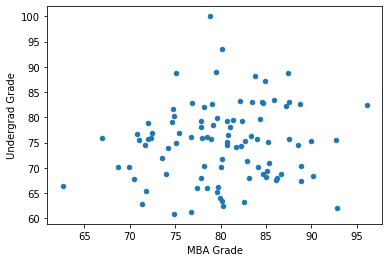

In [844]:
Scatterplots_df.plot(kind='scatter', x='MBA Grade', y='Undergrad Grade')

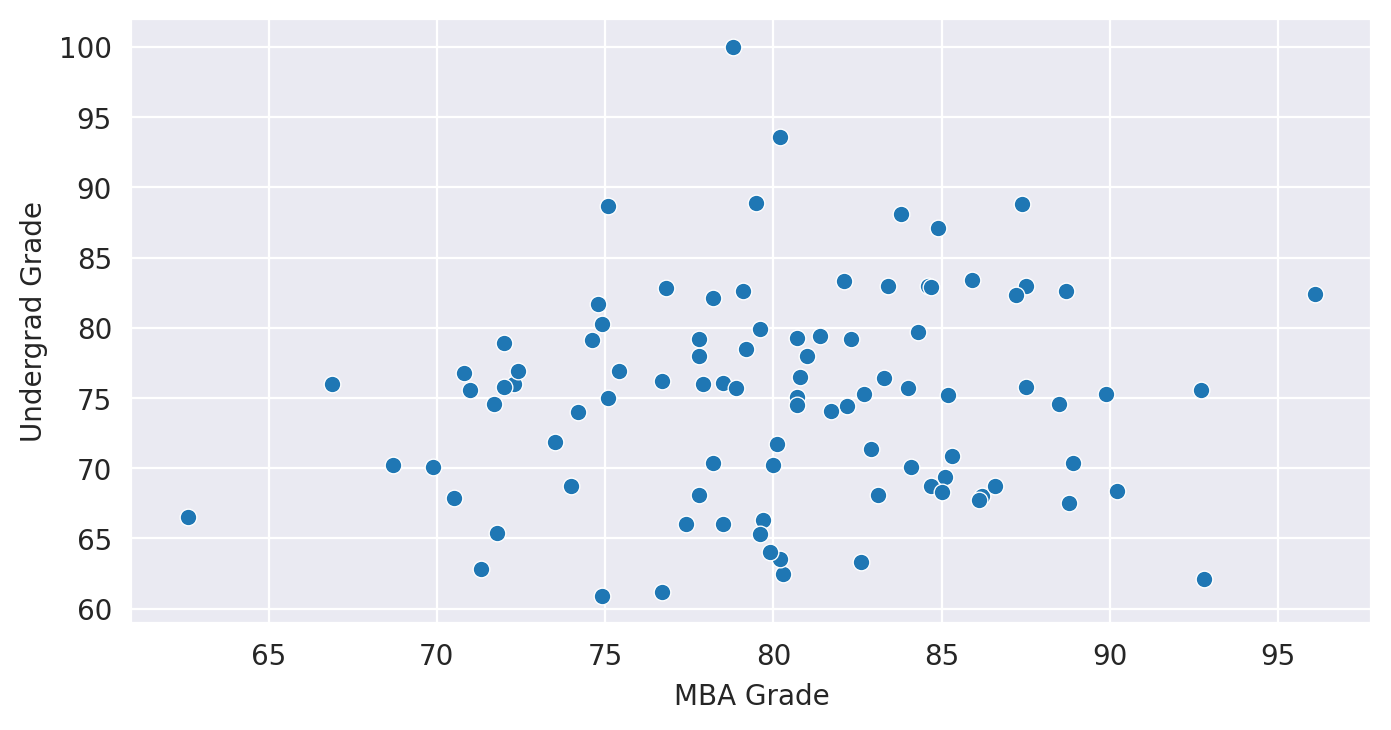

In [850]:
plt.figure(figsize=(8,4), dpi=200)
 
# set styling on a single chart
with sns.axes_style('darkgrid'):
  ax = sns.scatterplot(data=Scatterplots_df,x='MBA Grade', y='Undergrad Grade')
 
  ax.set(ylabel='Undergrad Grade',
        xlabel='MBA Grade')

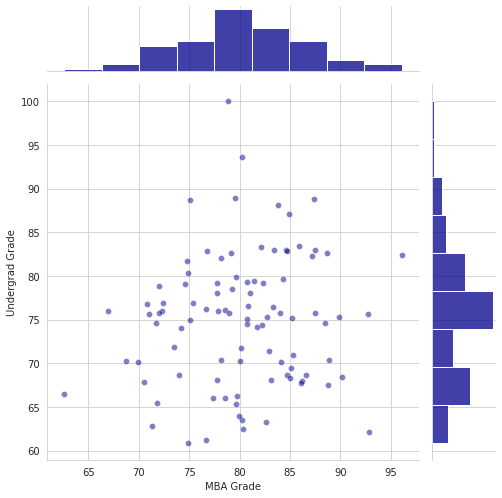

In [851]:
with sns.axes_style('whitegrid'):
  sns.jointplot(data=Scatterplots_df,x='MBA Grade', y='Undergrad Grade', 
                height=7, 
                color='darkblue',
                joint_kws={'alpha':0.5})
plt.show()

In [853]:
# Correlation
corr = Scatterplots_df.corr()
corr

,Undergrad Grade,MBA Grade
Undergrad Grade,1.000000,0.106056
MBA Grade,0.106056,1.000000


In [854]:
# Linear Relationships
Confidence_Intervals_d_df = pd.read_csv('Confidence Intervals (d).csv')

In [855]:
Confidence_Intervals_d_df.head()

,Student ID,Employability (Before),Employability (After)
0,1,252,276
1,2,423,410
2,3,101,119
3,4,288,334
4,5,248,252


In [871]:
dfSummary(Confidence_Intervals_d_df)

No,Variable,Stats / Values,Freqs / (% of Valid),Graph,Missing
1,Student ID[int64],Mean (sd) : 48.0 (27.6)min < med < max:1.0 < 48.0 < 95.0IQR (CV) : 47.0 (1.7),95 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABJUlEQVR4nO3WMUrEQBxG8ShCmr9ttrCRXEAv4CE8wbReKyfwFN7DxsLU0wQCsV82MAOOWXzv1+7wMeFBsjfbtnX6/26PvoD+xt3eD8MwvEbEqWQk5/w9z/N7ydlWuzWu4dlabl/a3Q0dEaeU0lfJ8DRNDyXnWu7WuIZna7l9addXN4ShIQwNsfuNrrEsy/M4jm8lZ9d1feq6ruhbU7Obc36MiM8j71Cz23r73K+E7vv+vuKPwkur3ZTSx9F3KN1tvX3OVzeEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNIShIQwNYWgIQ0MYGsLQEIaGMDSEoSEMDWFoCENDGBrC0BCGhjA0hKEhDA1haAhDQxgawtAQhoYwNMQPyGZ5ZnER4gcAAAAASUVORK5CYII="">",0(0.0%)
2,Employability (Before)[int64],Mean (sd) : 239.9 (85.9)min < med < max:62.0 < 236.0 < 423.0IQR (CV) : 105.5 (2.8),83 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABW0lEQVR4nO3bP2rDMBiHYbUEvKirM2QpvkB7gR4iJ9Caa/kEOUXukaVDPXsxGNwThOjD+hP0e59ZEMGLLWEpb9u2ObTvvfYEUMah9gRS6fv+7L0/xoyd5/lvmqZr7jm9kmZCe++PIYTfmLHjOJ5yz+fV8OoWQWgRhBZBaBGEFkFoEYQWQWgRzXwwsViW5XsYhkvM2Fa+okmG7rruQ+0rGq9uEYQWQWgRhBZBaBGEFkFoEYQWQWgRhBZBaBGEFlH8UMN4//rTe3+PGbuu65dzLuqgQlHx0Mb71z8hhFvs2H0za1uS0JanlCevjiShrU9pit+EDZsxEZI3THKxLGHOlb2mROiELEuYc2WvKRH6CctFwpwbzb1/Cyb0E8aLhNk2mnv/FsxmTAShRRBaBGt0RSU3eoSuqORGj1e3CEKLILSIh2s0R49teRiao8e28OoWQWgRhBZBaBGEFvEPP0pzdMCTMdgAAAAASUVORK5CYII="">",0(0.0%)
3,Employability (After)[int64],Mean (sd) : 289.3 (93.5)min < med < max:102.0 < 286.0 < 481.0IQR (CV) : 120.0 (3.1),81 distinct values,"<img src = ""data:image/png;base64, iVBORw0KGgoAAAANSUhEUgAAAHoAAAAyCAYAAACTUs/lAAAAOXRFWHRTb2Z0d2FyZQBNYXRwbG90bGliIHZlcnNpb24zLjUuMSwgaHR0cHM6Ly9tYXRwbG90bGliLm9yZy/YYfK9AAAACXBIWXMAAAsTAAALEwEAmpwYAAABY0lEQVR4nO3bsW3DMBBGYSYIoObSykWaQAskC3iITMA2a2mCTJE90qSIajYCBCgT2OZZFiXzf19NwIQffLYo+WGe54D6PW69AZTxtPUGzmnb9sPMDjlrU0p/wzB8rb2ne7Xr0GZ2iDH+5qzt+/5l7f3cM0a3CEKLILQIQosgtAhCiyC0CEKLILSIXZ+MeYzj+N513WfO2pTSq5n9ZK6t4mi1mtBN0zw7jkuPMcbvzLVVHK0yukVU84lei/MrYbdjntAXOL8SdjvmGd0iCC2C0CIILaL4jzHPc2DTNL2FELJ+COG84qGdz4Ed196PCka3CEKLILQIQosgtAhCizh5ecX/nvw8d7pC8L1vS3ucDM3/nvw8d7pC8L1vS3swukVwP3pDnlG/9DiY0BvyPue25LUY3SIILYLQIggtgtAiCC2C0CJuch1d8sIf17lJ6JIX/rgOo1sEoUUQWgShRRBaBKFF/APT/3+EFT2PQgAAAABJRU5ErkJggg=="">",0(0.0%)


<AxesSubplot:xlabel='Employability (Before)', ylabel='Employability (After)'>

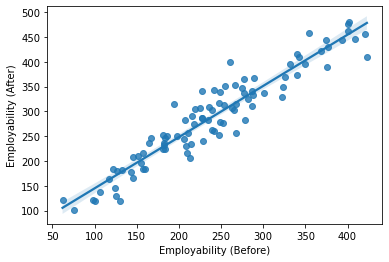

In [856]:
sns.regplot(data=Confidence_Intervals_d_df, 
            x='Employability (Before)',
            y='Employability (After)')

In [857]:
corr = Confidence_Intervals_d_df.corr()
corr

,Student ID,Employability (Before),Employability (After)
Student ID,1.000000,0.216702,0.205145
Employability (Before),0.216702,1.000000,0.948866
Employability (After),0.205145,0.948866,1.000000


In [859]:
x = Confidence_Intervals_d_df[['Employability (Before)']]
y = Confidence_Intervals_d_df['Employability (After)']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                              OLS Regression Results                             
Dep. Variable:     Employability (After)   R-squared:                       0.900
Model:                               OLS   Adj. R-squared:                  0.899
Method:                    Least Squares   F-statistic:                     840.2
Date:                   Mon, 13 Feb 2023   Prob (F-statistic):           2.34e-48
Time:                           17:07:11   Log-Likelihood:                -455.89
No. Observations:                     95   AIC:                             915.8
Df Residuals:                         93   BIC:                             920.9
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [861]:
reg = LinearRegression()
reg.fit(Confidence_Intervals_d_df[['Employability (Before)']], Confidence_Intervals_d_df['Employability (After)'])

LinearRegression()

In [863]:
reg.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [865]:
reg.coef_

array([1.0325626])

In [866]:
reg.intercept_

41.63016671209161

In [876]:
x_input = np.linspace(60, 430, 370).reshape(-1, 1)

In [877]:
y_output = reg.predict(x_input)

C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [882]:
reg.predict([[250]])

C:\Users\mahmo\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([299.77081612])

# Projects

In [118]:
# Pizza sales

In [119]:
pizza_sales_df = pd.read_excel('Pizza_Sales.xlsx')

In [120]:
pizza_sales_df.head()

,Date,Weekday,Pizzas
0,2015-01-01,Thursday,162
1,2015-01-02,Friday,165
2,2015-01-03,Saturday,158
3,2015-01-04,Sunday,106
4,2015-01-05,Monday,125


In [121]:
pizza_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     358 non-null    datetime64[ns]
 1   Weekday  358 non-null    object        
 2   Pizzas   358 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 8.5+ KB


In [129]:
mean, median, mode, max_val, min_val, std, var = pizza_sales_df.Pizzas.mean(), pizza_sales_df.Pizzas.median(), pizza_sales_df.Pizzas.mode(), pizza_sales_df.Pizzas.max(), pizza_sales_df.Pizzas.min(), pizza_sales_df.Pizzas.std(), pizza_sales_df.Pizzas.var()

In [130]:
mean

138.47486033519553

In [131]:
median

136.0

In [132]:
mode

0    136
1    144
Name: Pizzas, dtype: int64

In [133]:
max_val

266

In [134]:
min_val

77

In [135]:
std

24.428669026957206

In [136]:
var

596.7598704286183

In [143]:
print(pizza_sales_df.Pizzas.quantile(q=[0.25, 0.75]))

0.25    124.0
0.75    150.0
Name: Pizzas, dtype: float64


In [148]:
pizza_sales_df.Pizzas.quantile(q=0.25)

124.0

In [149]:
print(f'Min: {min_val}')
print(f'Q1: {pizza_sales_df.Pizzas.quantile(q=0.25)}')
print(f'Median: {median}')
print(f'Q3: {pizza_sales_df.Pizzas.quantile(q=0.75)}')
print(f'Max: {max_val}')

Min: 77
Q1: 124.0
Median: 136.0
Q3: 150.0
Max: 266


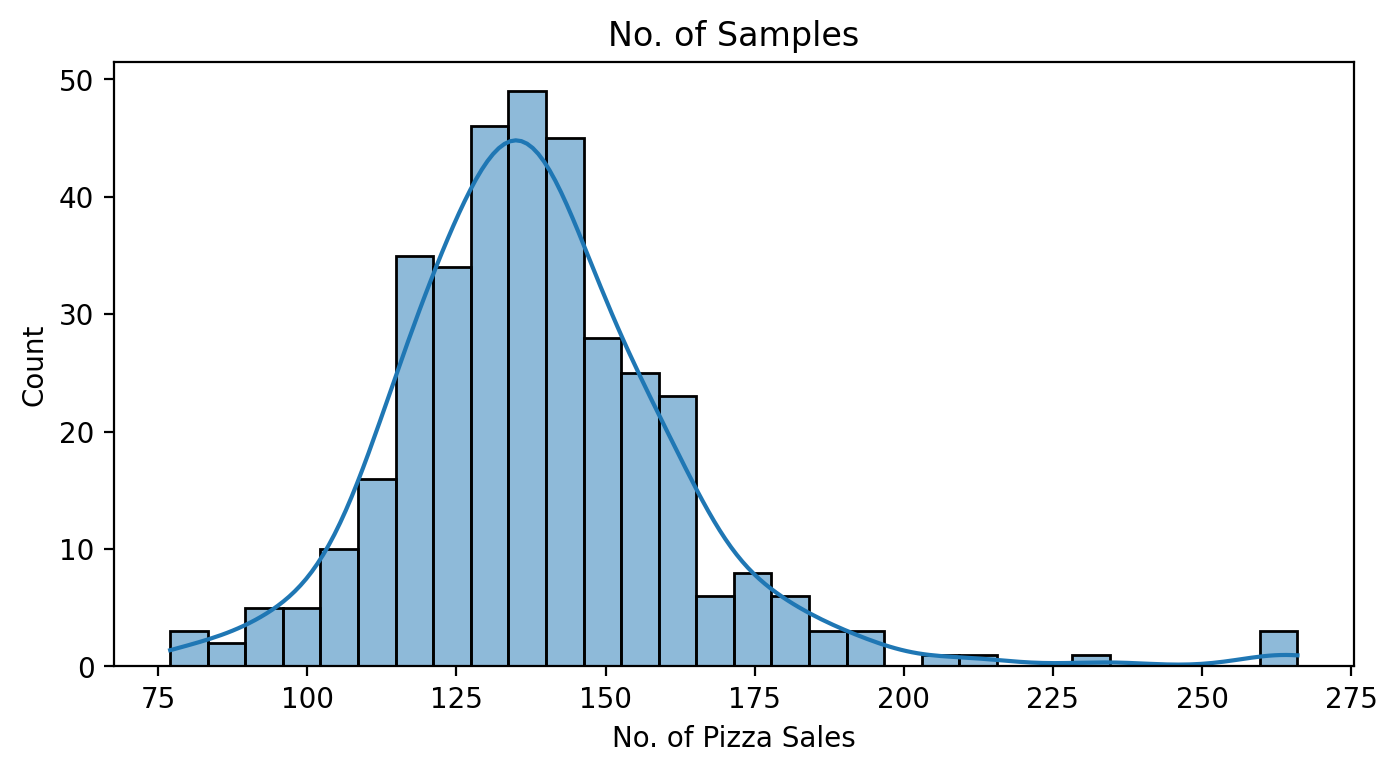

In [152]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=pizza_sales_df.Pizzas,
             bins=30,
             kde=True)
plt.xlabel('No. of Pizza Sales')
plt.title('No. of Samples')
plt.show()

In [165]:
pv_table = pd.pivot_table(data=pizza_sales_df, 
               index=['Weekday'], 
               aggfunc={'Pizzas': 'mean'})
pv_table

,Pizzas
Weekday,
Friday,164.840000
Monday,135.104167
Saturday,144.096154
Sunday,116.057692
Thursday,143.807692
Tuesday,132.596154
Wednesday,133.576923


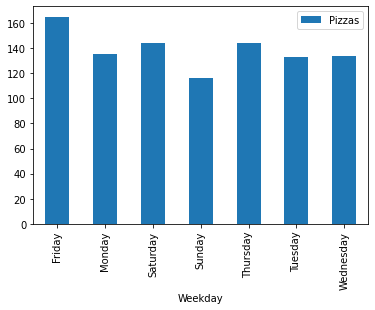

In [166]:
pv_table.plot(kind='bar');

In [168]:
pizza_sales_df.Weekday.value_counts()

Thursday     52
Saturday     52
Sunday       52
Tuesday      52
Wednesday    52
Friday       50
Monday       48
Name: Weekday, dtype: int64

In [239]:
# Babies born Project

In [240]:
babies_df = pd.read_excel('Birth_Weights.xlsx')

In [241]:
babies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 189 entries, 0 to 188
Data columns (total 1 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Weight (grams)  189 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


In [242]:
babies_df.head()

,Weight (grams)
0,2523
1,2551
2,2557
3,2594
4,2600


In [243]:
babies_df.describe()

,Weight (grams)
count,189.000000
mean,2944.587302
std,729.214295
min,709.000000
25%,2414.000000
50%,2977.000000
75%,3487.000000
max,4990.000000


In [247]:
mean = babies_df.mean().values[0]
mean

2944.5873015873017

In [248]:
stdiv = babies_df.std().values[0]
stdiv

729.2142952167977

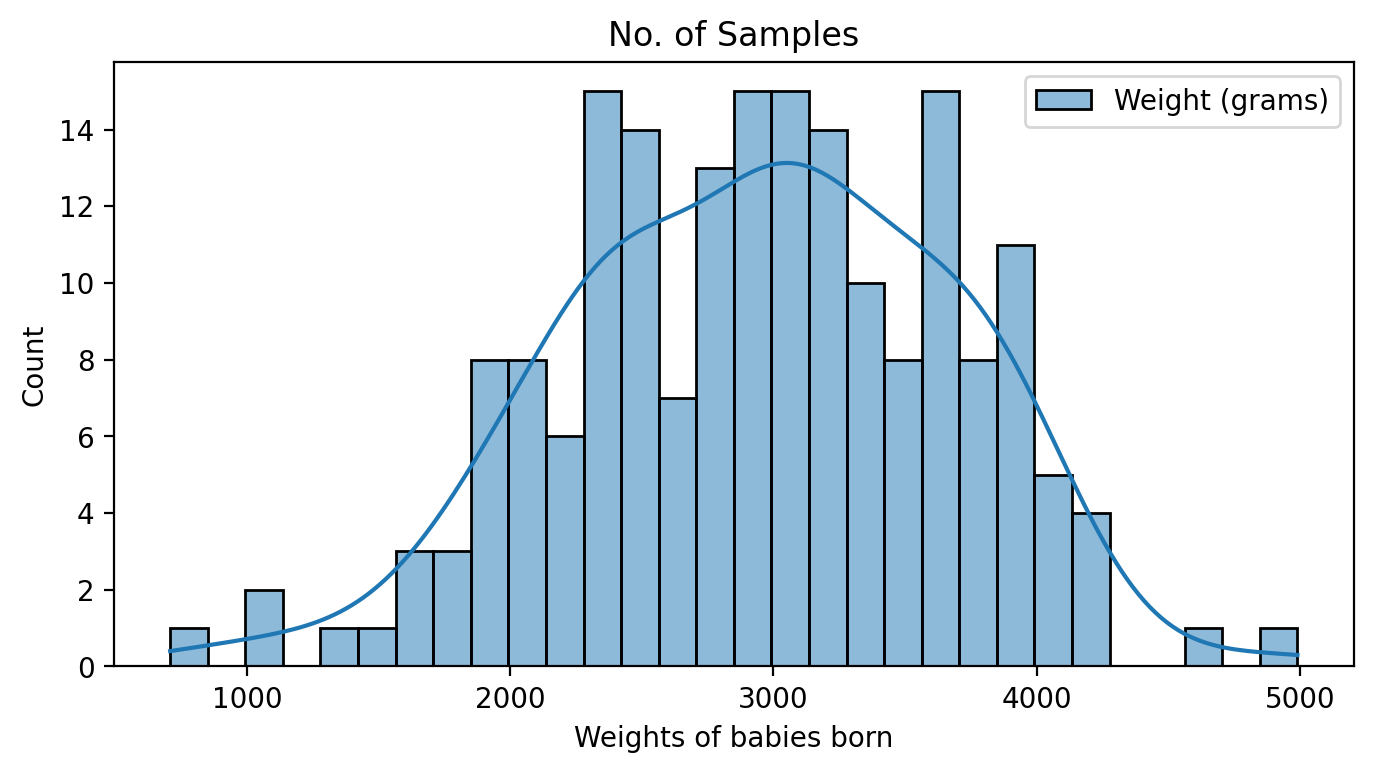

In [249]:
plt.figure(figsize=(8, 4), dpi=200)
sns.histplot(data=babies_df,
             bins=30,
             kde=True)
plt.xlabel('Weights of babies born')
plt.title('No. of Samples')
plt.show()

In [250]:
empirical_rule(babies_df)

,1,2,3
Lower,2215.373006,1486.158711,756.944416
Upper,3673.801597,4403.015892,5132.230187
Empirical Rule,68.000000,95.000000,99.700000
Sample,67.724868,96.296296,99.470899


In [251]:
NormalDist(mu=babies_df.mean()[0], sigma=babies_df.std()[0]).cdf(2500)*100

27.103693458863887

In [252]:
NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.01)

1248.1811761895142

In [255]:
babies_df[babies_df['Weight (grams)'] < NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.01)]

,Weight (grams)
130,709
131,1021
132,1135


In [253]:
NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.99)

4640.993426985089

In [256]:
babies_df[babies_df['Weight (grams)'] > NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.99)]

,Weight (grams)
129,4990


In [257]:
babies_df[(babies_df['Weight (grams)'] < NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.01)) | (babies_df['Weight (grams)'] > NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.99))]

,Weight (grams)
129,4990
130,709
131,1021
132,1135


In [258]:
babies_df[(babies_df['Weight (grams)'] < NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.01)) | (babies_df['Weight (grams)'] > NormalDist(mu=mean, sigma=stdiv).inv_cdf(0.99))].count()

Weight (grams)    4
dtype: int64

In [661]:
# Pharama Project

In [686]:
pharma_df = pd.read_excel('Treatment_Results.xlsx')

In [687]:
pharma_df.head()

,Treatment,Improved
0,Treated,Some
1,Treated,None
2,Treated,None
3,Treated,Marked
4,Treated,Marked


In [688]:
pharma_df.Treatment.value_counts()

Placebo    43
Treated    41
Name: Treatment, dtype: int64

In [689]:
pharma_df.Improved.value_counts()

None      42
Marked    28
Some      14
Name: Improved, dtype: int64

In [690]:
pharma_df_treated_sample_size = len(pharma_df[pharma_df.Treatment == 'Treated'])
pharma_df_treated_sample_size

41

In [691]:
pharma_df_placebo_sample_size = len(pharma_df[pharma_df.Treatment == 'Placebo'])
pharma_df_placebo_sample_size

43

In [692]:
p_treated_improved = pharma_df[(pharma_df.Treatment == 'Treated') & (pharma_df.Improved == 'Marked')].count().values[0]/pharma_df_treated_sample_size
p_treated_improved

0.5121951219512195

In [693]:
p_placebo_improved = pharma_df[(pharma_df.Treatment == 'Placebo') & (pharma_df.Improved == 'Marked')].count().values[0]/pharma_df_placebo_sample_size
p_placebo_improved

0.16279069767441862

In [694]:
# CLT TESTS
print(p_treated_improved*pharma_df_treated_sample_size>5)
print((1-p_treated_improved)*pharma_df_treated_sample_size>5)

print(p_placebo_improved*pharma_df_placebo_sample_size>5)
print((1-p_placebo_improved)*pharma_df_placebo_sample_size>5)

True
True
True
True


In [695]:
p1_p2 = p_treated_improved-p_placebo_improved
p1_p2

0.3494044242768009

In [696]:
confidence_level = 0.99

In [697]:
alpha = 1-confidence_level
alpha

0.010000000000000009

In [698]:
critical_value_z = stats.norm.ppf(1-(alpha/2))
critical_value_z

2.5758293035489004

In [699]:
standard_error = np.sqrt(((p_treated_improved*(1-p_treated_improved))/pharma_df_treated_sample_size)+((p_placebo_improved*(1-p_placebo_improved))/pharma_df_placebo_sample_size))
standard_error

0.09624690060778535

In [700]:
margin_of_error = standard_error*critical_value_z
margin_of_error

0.24791558696129196

In [701]:
confidence_interval = [(p1_p2 - margin_of_error)*100, (p1_p2 + margin_of_error)*100]
confidence_interval

[10.148883731550896, 59.73200112380928]

In [837]:
# Car saftey project

In [838]:
df_cars = pd.read_excel('Car_Speeds.xlsx')

In [839]:
df_cars.head()

,Before,Shortly After,After
0,33,28,30
1,34,24,30
2,32,34,27
3,32,34,30
4,26,37,25
